In [84]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
column_names = ["label", "text"]
file_path = r"C:\Users\HP\Desktop\ml research\spam1.csv"
df = pd.read_csv(file_path, encoding='latin-1', names=column_names)

In [87]:
df.head(100)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
95,spam,Your free ringtone is waiting to be collected....
96,ham,Watching telugu movie..wat abt u?
97,ham,i see. When we finish we have loads of loans t...
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...


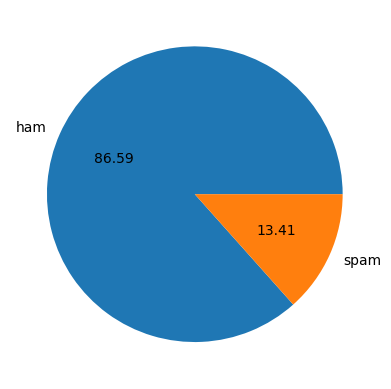

In [101]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


TEXT CLEANING AND PREPROCESSING


In [89]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
import nltk
nltk.download('wordnet')
ps = PorterStemmer()
def cleaned_text(text):
      text = text.lower()
      text = nltk.word_tokenize(text)

      y = []
      for i in text:
        if i.isalnum():
            y.append(i)

        text = y[:]
        y.clear()

        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)

        text = y[:]
        y.clear()

        for i in text:
            y.append(ps.stem(i))

        return " ".join(y)

df['clean_text'] = df['text'].apply(cleaned_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
df.head(100)

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go
1,0,Ok lar... Joking wif u oni...,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free
3,0,U dun say so early hor... U c already then say...,u
4,0,"Nah I don't think he goes to usf, he lives aro...",nah
...,...,...,...
95,1,Your free ringtone is waiting to be collected....,
96,0,Watching telugu movie..wat abt u?,watch
97,0,i see. When we finish we have loads of loans t...,
98,0,Hi. Wk been ok - on hols now! Yes on for a bit...,hi


In [93]:
# Split the dataset into features (X) and target labels (y)
X = df['clean_text']
y = df['label']

In [94]:
# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# Vectorize the text data
X = tfidf.fit_transform(X)

In [95]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

## Prediction
y_pred=clf.predict(X_test)

In [96]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9103139013452914

In [97]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9103139013452914
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       965
           1       0.88      0.39      0.54       150

    accuracy                           0.91      1115
   macro avg       0.90      0.69      0.74      1115
weighted avg       0.91      0.91      0.89      1115

Confusion Matrix:
[[957   8]
 [ 92  58]]


In [98]:
import pickle
pickle.dump(tfidf,open('vectorizer4.pkl','wb'))
pickle.dump(clf,open('model4.pkl','wb'))

In [99]:
import os

# Get the current directory
current_directory = os.getcwd()

# List the contents of the current directory
files = os.listdir(current_directory)
print(files)


['app.py', 'email-classification', 'model3.pkl', 'model4.pkl', 'modeltrain_2.ipynb', 'spam1.csv', 'vectorizer3.pkl', 'vectorizer4.pkl']


**Prediction on new data**

In [100]:
# Make predictions on new data
new_text = [
    "Congratulations! You've won a prize. Claim it now!",
    "Let's have a meeting tomorrow.",
    "Get 50% off on all products. Limited time offer!"
]

# Clean the new text data
new_cleaned_text = [clean_text(text) for text in new_text]

# Vectorize the cleaned text data
new_vectorized_text = tfidf.transform(new_cleaned_text)

# Predict the labels for the new data
predictions = clf.predict(new_vectorized_text)

# Print the predictions
for text, prediction in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Prediction: {'spam' if prediction == 1 else 'ham'}")
    print()

Text: Congratulations! You've won a prize. Claim it now!
Prediction: spam

Text: Let's have a meeting tomorrow.
Prediction: ham

Text: Get 50% off on all products. Limited time offer!
Prediction: spam

